# Sprawozdanie z cw.1 Antoni Kois gr.2

In [13]:
!pip3 install openpyxl seaborn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.


In [14]:
import pandas as pd

# Wczytanie danych z pliku
df = pd.read_excel('dane_przekrojowe_przykład.xlsx')

# Wyświetlenie pierwszych kilku wierszy danych
print(df.head())

# Podstawowe statystyki opisowe
print(df.describe())

# Sprawdzanie brakujących danych
print(df.isnull().sum())

  model  year  price transmission  mileage fuelType  tax   mpg  engineSize
0    A1  2017  12500       Manual    15735   Petrol  150  55.4         1.4
1    A6  2016  16500    Automatic    36203   Diesel   20  64.2         2.0
2    A1  2016  11000       Manual    29946   Petrol   30  55.4         1.4
3    A4  2017  16800    Automatic    25952   Diesel  145  67.3         2.0
4    A3  2019  17300       Manual     1998   Petrol  145  49.6         1.0
               year          price        mileage           tax           mpg  \
count  10668.000000   10668.000000   10668.000000  10668.000000  10668.000000   
mean    2017.100675   22896.685039   24827.244001    126.011436     50.770022   
std        2.167494   11714.841888   23505.257205     67.170294     12.949782   
min     1997.000000    1490.000000       1.000000      0.000000     18.900000   
25%     2016.000000   15130.750000    5968.750000    125.000000     40.900000   
50%     2017.000000   20200.000000   19000.000000    145.000000 

# Zadanie 1. Wstępna analiza danych

### 1.1
**Price (Cena):**
Średnia cena to 22,896.69 £.
Cena ma szeroki rozrzut, z minimalną ceną wynoszącą 1490 £ i maksymalną 145,000 £.
Standardowe odchylenie wynosi 11,714.84 £, co wskazuje na dużą zmienność cen w zbiorze danych.

**Mileage (Przebieg):**
Średni przebieg to 24,827.24 mil.
Zmienność jest także spora (standardowe odchylenie 23,505.26 mil), a zakres przebiegu wynosi od 1 mil do 323,000 mil.
Minimalny przebieg wynoszący 1 mil może wskazywać na błędne lub nierealistyczne dane, które należy sprawdzić.

**Tax (Podatek drogowy):**
Średnia wartość podatku wynosi 126.01 £, z zakresem od 0 do 580 £.
Zmienność jest mniejsza niż w przypadku ceny czy przebiegu, ale standardowe odchylenie wynosi 67.17 £, co pokazuje, że są znaczne różnice między ofertami.

**Engine Size (Pojemność silnika):**
Średnia pojemność silnika wynosi 1.93 litra, z zakresem od 0 do 6.0 litra.
Standardowe odchylenie wynosi 0.60 litra, co wskazuje na średnią zmienność w pojemności silnika.

Z wyników df.isnull().sum() widać, że w zbiorze nie ma brakujących danych:

### 1.2
Dla wymienionych 4 zmiennych wyznaczyć wartości współczynników zmienności. W oparciu o nie ocenić, czy na podstawie tych danych można zbudować teoretycznie poprawny model ekonometryczny

In [15]:
# Obliczenie współczynnika zmienności dla każdej zmiennej
cv = df[['price', 'mileage', 'tax', 'engineSize']].std() / df[['price', 'mileage', 'tax', 'engineSize']].mean()

# Wyświetlenie wyników
print(cv)

price         0.511639
mileage       0.946753
tax           0.533049
engineSize    0.312298
dtype: float64


**Price (Cena):**
Współczynnik zmienności wynosi około 0.512, co oznacza, że cena jest stosunkowo zmienna w porównaniu do średniej ceny.
**Mileage (Przebieg):**
Współczynnik zmienności wynosi około 0.946, co wskazuje na dużą zmienność przebiegu w porównaniu do średniego przebiegu. Jest to najwyższa zmienność z rozważanych zmiennych.
**Tax (Podatek drogowy):**
Współczynnik zmienności wynosi około 0.532, co wskazuje na średnią zmienność podatku drogowego w stosunku do jego średniej wartości.
**EngineSize (Pojemność silnika):**
Współczynnik zmienności wynosi około 0.312, co oznacza najmniejszą zmienność spośród rozważanych zmiennych. Pojemność silnika jest najmniej zmienną zmienną w tym zbiorze danych.

### 1.3
Sporządzić wykresy pudełkowe dla rozważanych zmiennych. Na ich podstawie oceń, czy w zbiorze występują wartości odstające.

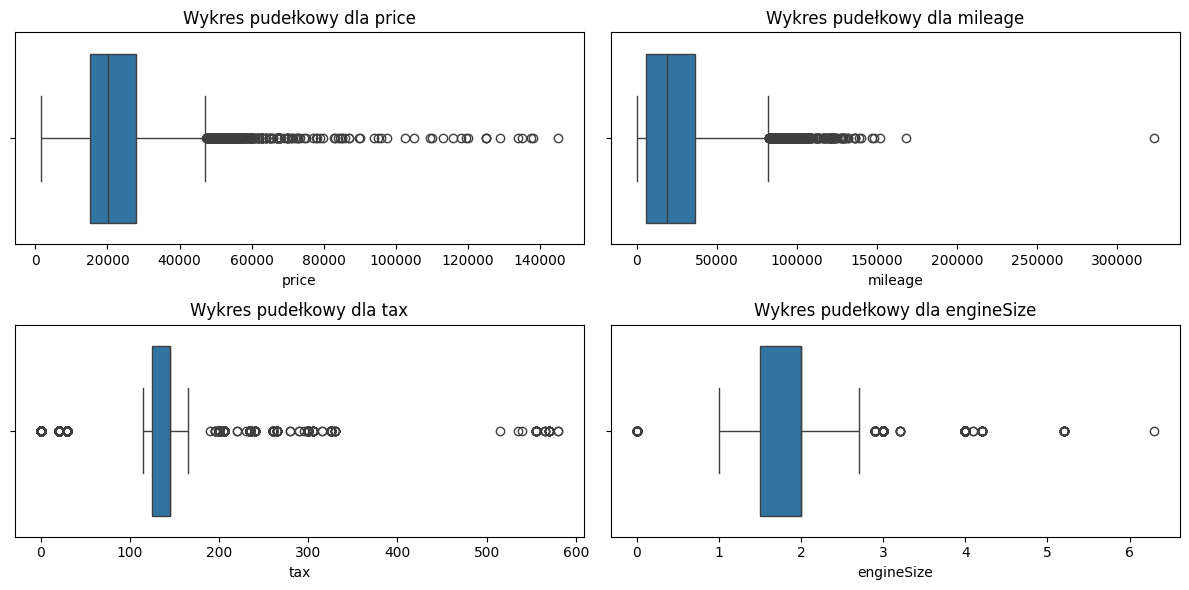

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tworzenie wykresów pudełkowych
plt.figure(figsize=(12, 6))

# Wykres pudełkowy dla każdej zmiennej
for i, col in enumerate(['price', 'mileage', 'tax', 'engineSize']):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x=df[col])
    plt.title(f'Wykres pudełkowy dla {col}')

plt.tight_layout()
plt.show()

Dla wszystkich zmiennych występuje spora ilość zmiennych odstających

# Zadanie 2. Analiza zależności pomiędzy zmiennymi

### 2.1
Wyznaczyć wartości współczynników korelacji pomiędzy wszystkimi rozważanymi zmiennymi.

In [17]:
# Wyznaczenie współczynników korelacji
correlation_matrix = df[['price', 'mileage', 'tax', 'engineSize']].corr()

# Wyświetlenie macierzy korelacji
print(correlation_matrix)

               price   mileage       tax  engineSize
price       1.000000 -0.535357  0.356157    0.591262
mileage    -0.535357  1.000000 -0.166547    0.070710
tax         0.356157 -0.166547  1.000000    0.393075
engineSize  0.591262  0.070710  0.393075    1.000000


### 2.2 
Zinterpretować wartości współczynników korelacji pomiędzy zmiennymi objaśniającymi a zmienną objaśnianą oraz pomiędzy zmiennymi objaśniającymi. Jak powinny kształtować się te wartości, aby można było wykorzystać wszystkie te zmienne do budowy modelu?

**Interpretacja:** 1. Cena (price) a przebieg (mileage):
Współczynnik korelacji: -0.535357.
Jest to średnia ujemna korelacja. Oznacza to, że im wyższy przebieg, tym niższa cena samochodu. Korelacja jest dosyć silna, co sugeruje, że przebieg jest ważnym czynnikiem wpływającym na cenę samochodu. Wartość ta jest na tyle wysoka, by można było z niej skorzystać w modelu predykcyjnym.
2. Cena (price) a podatek (tax):
Współczynnik korelacji: 0.356157.
Jest to słaba dodatnia korelacja. Oznacza to, że istnieje pewna zależność między ceną a podatkiem drogowym, ale nie jest ona silna. Możliwe, że podatek nie jest kluczowym czynnikiem w ustalaniu ceny, ale może mieć wpływ w przypadku niektórych samochodów. Zmienna ta może być użyteczna, ale nie jest dominującym czynnikiem.
3. Cena (price) a pojemność silnika (engineSize):
Współczynnik korelacji: 0.591262.
Jest to średnia dodatnia korelacja. Oznacza to, że większa pojemność silnika jest związana z wyższą ceną samochodu. Wartość ta sugeruje, że pojemność silnika ma istotny wpływ na cenę i może być silnym czynnikiem w modelu predykcyjnym.
4. Przebieg (mileage) a podatek (tax):
Współczynnik korelacji: -0.166547.
Jest to bardzo słaba ujemna korelacja. Oznacza to, że nie ma wyraźnej zależności pomiędzy tymi dwiema zmiennymi. Zmienność przebiegu nie wpływa silnie na podatek, co jest zgodne z intuicją, ponieważ podatek może być uzależniony bardziej od parametrów technicznych samochodu, a nie od jego przebiegu.
5. Przebieg (mileage) a pojemność silnika (engineSize):
Współczynnik korelacji: 0.070710.
Jest to bardzo słaba dodatnia korelacja. Oznacza to, że nie ma praktycznie żadnej zależności pomiędzy przebiegiem a pojemnością silnika. Wartość ta sugeruje, że te zmienne są niezależne od siebie.
6. Podatek (tax) a pojemność silnika (engineSize):
Współczynnik korelacji: 0.393075.
Jest to słaba dodatnia korelacja. Oznacza to, że większa pojemność silnika jest nieco związana z wyższym podatkiem drogowym. Może to być związane z tym, że większe silniki często wiążą się z wyższymi kosztami eksploatacji, w tym podatkami drogowymi.

**Wnioski do budowy modelu:**
Aby móc wykorzystać te zmienne do budowy modelu predykcyjnego, zależności między zmiennymi powinny spełniać następujące warunki:

Silna korelacja z ceną: Wartości korelacji między zmiennymi objaśniającymi a zmienną objaśnianą (ceną) powinny być na tyle silne, by miały one wpływ na przewidywaną cenę. Zmienna przebieg (mileage) ma średnią korelację ujemną z ceną, a pojemność silnika (engineSize) ma średnią korelację dodatnią, więc te zmienne są odpowiednie do włączenia do modelu.

Brak silnych korelacji między zmiennymi objaśniającymi: Istnieją pewne korelacje między zmiennymi objaśniającymi, np. pojemność silnika (engineSize) ma korelację z podatkiem (tax), ale te korelacje są na tyle słabe, że nie będą one powodować problemów w modelu, takich jak multikolinearność. Należy jednak uważać na zmienne, które mogą być bardzo silnie skorelowane ze sobą.

**Podsumowanie:**
Zmienna "przebieg (mileage)" jest istotna, ponieważ ma średnią korelację z ceną, ale należy pamiętać, że ta korelacja jest ujemna.
Zmienna "pojemność silnika (engineSize)" jest również ważna, mając średnią dodatnią korelację z ceną.
Zmienna "podatek (tax)" ma słabą korelację z ceną, co może sugerować, że jej wpływ na model jest mniejszy.

### 2.3
Sporządzić wykresy zależności pomiędzy zmienną objaśnianą a zmiennymi objaśniającymi (dla każdej zmiennej objaśniającej z osobna) i na ich podstawie ocenić, czy istnieje liniowa zależność pomiędzy rozważanymi zmiennymi.

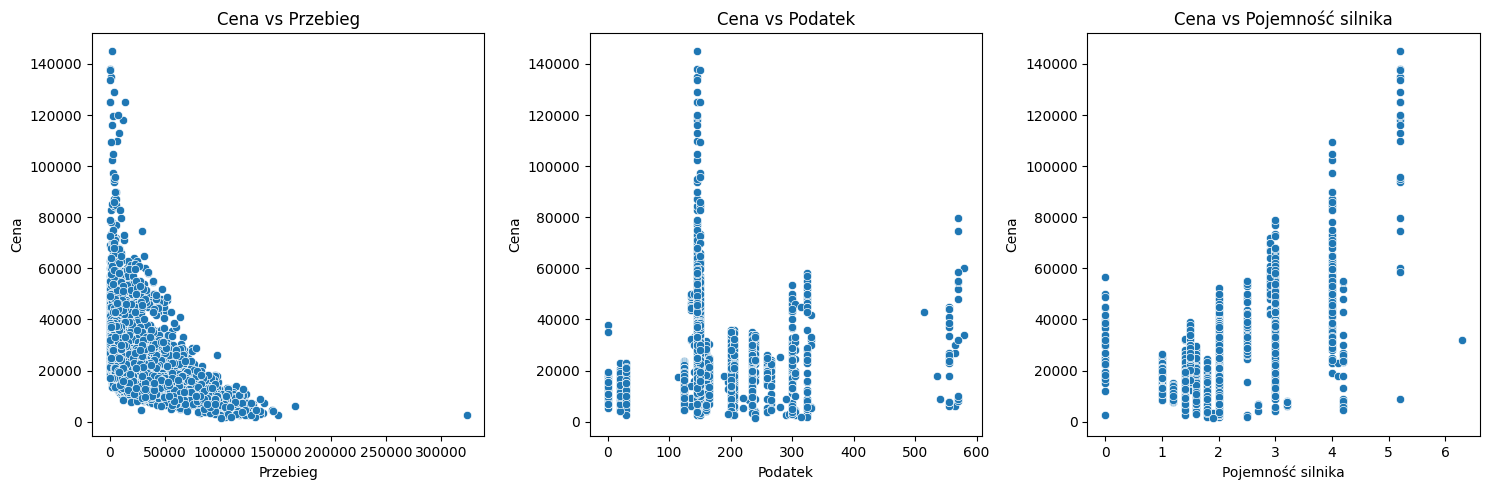

In [18]:
# Wykresy zależności
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Cena vs Przebieg
sns.scatterplot(x=df['mileage'], y=df['price'], ax=axes[0])
axes[0].set_title('Cena vs Przebieg')
axes[0].set_xlabel('Przebieg')
axes[0].set_ylabel('Cena')

# Cena vs Podatek
sns.scatterplot(x=df['tax'], y=df['price'], ax=axes[1])
axes[1].set_title('Cena vs Podatek')
axes[1].set_xlabel('Podatek')
axes[1].set_ylabel('Cena')

# Cena vs Pojemność silnika
sns.scatterplot(x=df['engineSize'], y=df['price'], ax=axes[2])
axes[2].set_title('Cena vs Pojemność silnika')
axes[2].set_xlabel('Pojemność silnika')
axes[2].set_ylabel('Cena')

plt.tight_layout()
plt.show()


Cena i przebieg mają liniową zależność, a także cena i pojemność silnika.
Zmienna "mileage" ma negatywną korelację z ceną, ale jest stosunkowo silna. "EngineSize" ma dodatnią korelację i wydaje się być dobrą zmienną do włączenia do modelu. Zmienna "tax" ma słabą korelację z ceną, co może sugerować, że jest mniej istotna w predykcji ceny.

# Zadanie 3. Metoda Hellwiga

### 3.1
Na podstawie metody Hellwiga doboru zmiennych do modelu znaleźć optymalny podzbiór zmiennych objaśniających. W tym celu należy rozważyć wszystkie możliwe kombinacje potencjalnych zmiennych objaśniających (mileage, tax, engineSize) i wyznaczyć dla nich indywidualne, a następnie integralne wskaźniki pojemności informacyjnej

In [19]:
import itertools
import numpy as np

# Dane (macierz korelacji obliczona wcześniej w 2.1)
correlation_matrix = pd.DataFrame({
    "price": [1.000000, -0.535357, 0.356157, 0.591262],
    "mileage": [-0.535357, 1.000000, -0.166547, 0.070710],
    "tax": [0.356157, -0.166547, 1.000000, 0.393075],
    "engineSize": [0.591262, 0.070710, 0.393075, 1.000000]
}, index=["price", "mileage", "tax", "engineSize"])

# Zmienna zależna i zbiór zmiennych objaśniających
y = "price"
X = ["mileage", "tax", "engineSize"]

# Wszystkie możliwe kombinacje zmiennych objaśniających
subsets = []
for r in range(1, len(X) + 1):
    subsets.extend(itertools.combinations(X, r))

hellwig_indices = {}

for subset in subsets:
    subset = list(subset)
    
    # Wektor korelacji zmiennych objaśniających z price
    r_yx = correlation_matrix.loc[y, subset].values
    
    # Macierz korelacji między zmiennymi objaśniającymi
    R_xx = correlation_matrix.loc[subset, subset].values
    
    # Wskaźnik Hellwiga H
    try:
        R_xx_inv = np.linalg.inv(R_xx)  # Odwracamy macierz korelacji zmiennych objaśniających
        h = np.sum((r_yx @ R_xx_inv) * r_yx) / len(subset)  # Obliczamy wskaźnik Hellwiga
        hellwig_indices[tuple(subset)] = h
    except np.linalg.LinAlgError:
        pass  # Jeśli macierz nie jest odwracalna, pomijamy ten przypadek

# Znalezienie najlepszego podzbioru zmiennych
best_subset = max(hellwig_indices, key=hellwig_indices.get)
best_hellwig_index = hellwig_indices[best_subset]

# Wyniki
print("Najlepszy podzbiór zmiennych objaśniających:", best_subset)
print("Najwyższy wskaźnik Hellwiga:", best_hellwig_index)


Najlepszy podzbiór zmiennych objaśniających: ('engineSize',)
Najwyższy wskaźnik Hellwiga: 0.34959075264399997


# Zadanie 4. Regularna para korelacyjna i katalizatory

### 4.1
Utworzyć parę korelacyjną

Para korelacyjna to dwie zmienne objaśniające, które są silnie skorelowane ze zmienną zależną (price).


Najsilniej skorelowane zmienne objaśniające z ceną:
engineSize (0.591)
mileage (-0.535)
tax (0.356)

Wybieram (engineSize, mileage) jako parę korelacyjną, ponieważ:
Engine size ma najwyższą dodatnią korelację z price
Mileage ma silną ujemną korelację z price

### 4.2
Przekształcić parę korelacyjną na regularną parę korelacyjną.


Ponieważ mileage ma ujemną korelację, musimy przekształcić ją na -mileage, aby spełnić warunek:
r price,−mileage=0.535
i wtedy mamy:
0<0.535<0.591

Ostateczna regularna para korelacyjna: (engineSize, -mileage)

### 4.3
Sprawdzić, czy wśród zmiennych objaśniających występuje katalizator

1. Czy rij < 0 ?
0.070 < 0 NIE

2. Czy rij > ri/rj
0.070 > 1.104 NIE

**Wnioski**
Zmienna -mileage nie jest katalizatorem
Zmienna engineSize nie jest katalizatorem
